# Data Input

In [1]:
from pandas import Series,DataFrame
import numpy as np
from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive')  # link google drive

Mounted at /content/gdrive


In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.utils import shuffle #shuffle the data
headerlist = ["area", "perimeter", "compactness", "length_of_kernel", "width_of_kernel", "asymmetry_coefficient", "length_of_kernel_groove"]
headerlist.append("label")
df = pd.read_csv("/content/gdrive/My Drive/機器學習概論/hw3/seeds_dataset.txt", names=headerlist, sep= '\t')
DataFrame(df)

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


# K-means Clustering Construct

In [4]:
def find_random_center_key(df_tmp):
  global feature, data_num, feature_num
  feature = df_tmp.drop(['label'], axis=1)
  data_num = feature.shape[0]
  feature_num = feature.shape[1]
  feature_min = feature.min()
  feature_max = feature.max()
  center_key_tmp = []
  for i in range(feature_num):
    tmp = np.random.randint(0, feature_max[i]-feature_min[i]+1, 3) + feature_min[i]
    center_key_tmp.append(tmp.tolist())

  #reorder center_key
  global center_key
  center_key = []
  for i in range(3):
    tmp = []
    for j in range(feature_num):
      tmp.append(center_key_tmp[j][i]) 
    center_key.append(tmp)

In [5]:
def dist(center, dot):
  sum = 0
  for i in range(feature_num):
    sum_tmp = (center[i]-dot[headerlist[i]])**2
    sum += sum_tmp
  sum = round(sum**0.5,6)
  return sum

In [6]:
def cluster(key):
  team_tmp = []
  team_member_tmp = []
  for i in range(3):
    team_tmp.append([])
    team_member_tmp.append([])

  for i in range(data_num):
    dist_min = 99999999
    for j in range(3):
      distance = dist(key[j], feature.iloc[i])
      if distance < dist_min:
        dist_min = distance
        flag = j
    tmp = []
    for k in range(feature_num):
      tmp.append(feature.iloc[i][headerlist[k]]) 
    team_tmp[flag].append(tmp)
    team_member_tmp[flag].append(i)
    
  return team_tmp, team_member_tmp

In [7]:
# repeat to find stable center key ,same as one or two times before

def find_stable_center_key():
  end = 0
  step = 0
  front_center_key = []
  origin_center_key = []
  while(1):
    step+=1
    if(step%2==1):
      front_center_key = center_key.copy()
    origin_center_key = center_key.copy()
    global team, team_member
    team, team_member = cluster(center_key)

    # if one set' size is 0, move max size one to it
    max = 0
    while(1):
      flag = 1
      for i in range(3):
        if(len(team[i]) >= len(team[max])):
          max = i
      for i in range(3):
        if(len(team[i])==0):
          flag = 0
          for j in range(int(len(team[max])/2)):
            team[i].append(team[max][j])
            team_member[i].append(team_member[max][j])
          for j in range(len(team[i])):
            team[max].remove(team[i][j])
            team_member[max].remove(team_member[i][j])
          break
      if(flag == 1):
        break

    for i in range(3):
      ave = np.array(team[i][0])
      for j in range(1,len(team[i])):
        ave += np.array(team[i][j])
      ave = np.round(ave/len(team[i]), 6)
      ave = list(ave)
      center_key[i] = ave

    print("step:", step, " center_key: ", center_key)
    if(front_center_key == center_key):
      end = 1
    elif(origin_center_key == center_key):
      end = 1
    if(end==1):
      break

In [8]:
def get_final_label_tmp(team_member_tmp):
  final_label_tmp = []
  for i in range(data_num):
    for j in range(3):
      if(team_member_tmp[j].count(i)):
        final_label_tmp.append(j+1)
  return pd.DataFrame(final_label_tmp, columns = ["label"])

In [24]:
from sklearn.metrics import accuracy_score
def get_final_label():
  global team_member_tmp1, team_member_tmp2, team_member_tmp3, team_member_tmp4, team_member_tmp5, team_member_tmp6
  team_member_tmp1 = team_member.copy()
  team_member_tmp2 = [team_member[0].copy(),team_member[2].copy(),team_member[1].copy()]
  team_member_tmp3 = [team_member[1].copy(),team_member[0].copy(),team_member[2].copy()]
  team_member_tmp4 = [team_member[1].copy(),team_member[2].copy(),team_member[0].copy()]
  team_member_tmp5 = [team_member[2].copy(),team_member[0].copy(),team_member[1].copy()]
  team_member_tmp6 = [team_member[2].copy(),team_member[1].copy(),team_member[0].copy()]

  global center_key_tmp1, center_key_tmp2, center_key_tmp3, center_key_tmp4, center_key_tmp5, center_key_tmp6
  center_key_tmp1 = center_key.copy()
  center_key_tmp2 = [center_key[0].copy(), center_key[2].copy(), center_key[1].copy()]
  center_key_tmp3 = [center_key[1].copy(), center_key[0].copy(), center_key[2].copy()]
  center_key_tmp4 = [center_key[1].copy(), center_key[2].copy(), center_key[0].copy()]
  center_key_tmp5 = [center_key[2].copy(), center_key[0].copy(), center_key[1].copy()]
  center_key_tmp6 = [center_key[2].copy(), center_key[1].copy(), center_key[0].copy()]
  acc_final = 0
  global final_label, final_center_key
  for i in range(1,7):
    globals()['final_label_tmp'+str(i)] = get_final_label_tmp(globals()['team_member_tmp'+str(i)])
    globals()['acc_tmp'+str(i)] = round(accuracy_score(df["label"], globals()['final_label_tmp'+str(i)])*100,2)
    if(globals()['acc_tmp'+str(i)]>=acc_final):
      acc_final = globals()['acc_tmp'+str(i)]
      final_label = globals()['final_label_tmp'+str(i)].copy()
      final_center_key = globals()['center_key_tmp'+str(i)].copy()

# Result

In [25]:
find_random_center_key(df)
find_stable_center_key()
get_final_label()

step: 1  center_key:  [[16.32, 15.1475, 0.8844, 5.74825, 3.5055, 7.3385, 5.57425], [19.529615, 16.639231, 0.886208, 6.339154, 3.807423, 3.033, 6.177923], [14.1385, 14.245778, 0.868504, 5.523228, 3.173844, 3.715723, 5.293178]]
step: 2  center_key:  [[15.881818, 15.003636, 0.882727, 5.719818, 3.436727, 6.296364, 5.525091], [18.844, 16.348, 0.885456, 6.234436, 3.734291, 3.3578, 6.089545], [13.242083, 13.842153, 0.864581, 5.390139, 3.063312, 3.632661, 5.138847]]
step: 3  center_key:  [[15.508235, 14.883529, 0.878265, 5.71, 3.370588, 5.400176, 5.551059], [18.604127, 16.237778, 0.885829, 6.192333, 3.712794, 3.344222, 6.026683], [12.940615, 13.703462, 0.862862, 5.344654, 3.023854, 3.650409, 5.089585]]
step: 4  center_key:  [[15.514074, 14.888148, 0.878619, 5.700259, 3.373815, 4.658222, 5.501296], [18.627742, 16.243548, 0.886355, 6.191806, 3.717145, 3.300389, 6.022645], [12.761818, 13.622893, 0.86143, 5.323909, 2.997942, 3.69129, 5.072364]]
step: 5  center_key:  [[15.468095, 14.855952, 0.88025

In [26]:
from sklearn.metrics import confusion_matrix
import sklearn
import matplotlib.pyplot as plt
from tabulate import tabulate
confusion = confusion_matrix(df["label"], final_label)
acc = round(accuracy_score(df["label"], final_label)*100,2)
rec = sklearn.metrics.recall_score(df["label"], final_label, average=None)
pre = sklearn.metrics.precision_score(df["label"], final_label, average=None)

print("K-means:")
print("Accuracy: {}%".format(acc))
print("\nconfusion matrix:\n", confusion)
table_head = ["class Name", "Sensitivity(Recall)", "Precision"]
table_data = [["class 1", "{}%".format(round(rec[0]*100,2)), "{}%".format(round(pre[0]*100,2))],
        ["class 2", "{}%".format(round(rec[1]*100,2)), "{}%".format(round(pre[1]*100,2))],
        ["class 3", "{}%".format(round(rec[2]*100,2)), "{}%".format(round(pre[2]*100,2))]]
print("\n",tabulate(table_data, headers=table_head, tablefmt="grid"))

K-means:
Accuracy: 89.05%

confusion matrix:
 [[57  1 12]
 [10 60  0]
 [ 0  0 70]]

 +--------------+-----------------------+-------------+
| class Name   | Sensitivity(Recall)   | Precision   |
+==============+=======================+=============+
| class 1      | 81.43%                | 85.07%      |
+--------------+-----------------------+-------------+
| class 2      | 85.71%                | 98.36%      |
+--------------+-----------------------+-------------+
| class 3      | 100.0%                | 85.37%      |
+--------------+-----------------------+-------------+


# Question

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
feature_pca = pca.fit_transform(df)
header = df.columns[0:2]
df_pca = DataFrame(feature_pca,columns = header)
df_pca["label"] = df["label"]
find_random_center_key(df_pca)
find_stable_center_key()
get_final_label()
df_pca["label"] = final_label

step: 1  center_key:  [[4.806771, 0.479988], [-1.364101, -0.280935], [-1.959074, 3.591217]]
step: 2  center_key:  [[4.207673, 0.53185], [-1.54788, -0.671686], [-3.516088, 2.238665]]
step: 3  center_key:  [[3.987067, 0.441484], [-1.041088, -1.126618], [-3.655644, 1.360099]]
step: 4  center_key:  [[4.052316, 0.515771], [-0.640637, -1.317771], [-3.57059, 1.095737]]
step: 5  center_key:  [[4.117225, 0.570172], [-0.450575, -1.329513], [-3.537948, 0.966286]]
step: 6  center_key:  [[4.117225, 0.570172], [-0.339011, -1.367994], [-3.478718, 0.87651]]
step: 7  center_key:  [[4.117225, 0.570172], [-0.236237, -1.372948], [-3.448652, 0.790203]]
step: 8  center_key:  [[4.184213, 0.606407], [-0.174852, -1.351181], [-3.448652, 0.790203]]
step: 9  center_key:  [[4.271604, 0.600285], [-0.107791, -1.30828], [-3.426276, 0.777157]]
step: 10  center_key:  [[4.271604, 0.600285], [-0.079079, -1.314797], [-3.409812, 0.75589]]
step: 11  center_key:  [[4.271604, 0.600285], [-0.045096, -1.313161], [-3.397891, 0.7

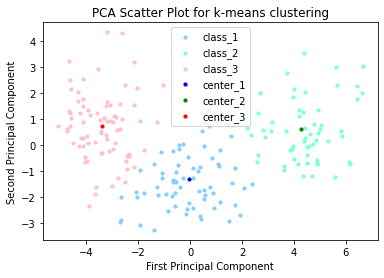

In [32]:
# In 3-means clustering, reduce the data dimension to 2 using PCA and draw a scatter plot

label = [1, 2, 3]
label_name = ["class_1", "class_2", "class_3", "center_1", "center_2", "center_3"]
colors = ['LightSkyBlue', 'Aquamarine', 'pink']
for i in range(len(colors)):
    df_tmp = df_pca[df_pca["label"] == label[i]]
    x = df_tmp[df_pca.columns[0]]
    y = df_tmp[df_pca.columns[1]]
    plt.scatter(x, y, c=colors[i], s=10)

center_colors = ['blue', 'green', 'red']
for i in range(3):
  center_x = final_center_key[i][0]
  center_y = final_center_key[i][1]
  plt.scatter(center_x, center_y, c=center_colors[i], s=10)

plt.legend(label_name)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot for k-means clustering")
plt.show()